# Program 4.04: Measurement of displacement caused by protrusions

## Preamble

In [ ]:
using NBInclude

In [2]:
@nbinclude("preamble/packages.ipynb");

In [3]:
@nbinclude("preamble/model.ipynb");

In [4]:
@nbinclude("preamble/functions.ipynb");

In [5]:
function msd(com, m1, m2)

    N = com.N
    msd = 0
    for i in 1:N
        x1 = com[m1].x[i]
        y1 = com[m1].y[i]
        z1 = com[m1].z[i]
        x2 = com[m2].x[i]
        y2 = com[m2].y[i]
        z2 = com[m2].z[i]
        msd += CBMMetrics.euclidean(x1,x2, y1,y2, z1,z2) ^ 2
    end

    msd /= N
    return msd

end;

In [6]:
function tmsd(com, m1, mn)
    return sum(msd(com, mi-1, mi) for mi in m1+1:mn)
end;

In [7]:
function simple_plot(x, y;
    xlabel = "",
    ylabel = "",
    xlim = undef,
    ylim = undef
    )

    labelsize = 40
    fig = Figure(resolution = (800, 800))
    # labelsize = 15
    # fig = Figure(resolution = (200, 200))
    ax = Axis(
        fig[1, 1],
        xlabel = xlabel,
        ylabel = ylabel,
    	xlabelsize = labelsize, 
        ylabelsize = labelsize,
        xticklabelsize = labelsize, 
        yticklabelsize = labelsize,
        aspect=1
    )
    if xlim != undef
        xlims!(xlim[1], xlim[2])
    end
    if ylim != undef
        ylims!(ylim[1], ylim[2])
    end
    
    lines!(ax, x, y, color = Makie.wong_colors()[5], linewidth = 5)
    display(fig)
end;

## Initialization

In [8]:
parameters = define_par();

dt = 0.002;
save_each = round(Int64, 0.25 / dt);
n_cells = 300;

### Aggregate

In [9]:
Random.seed!(2345)
com = initialize_growth(parameters; dt);

In [10]:
grow_size!(com, save_each, n_cells)
# grow_time!(com,save_each,30)
m0 = length(com);

┌ Warning: Using arrays or dicts to store parameters of different types can hurt performance.
│ Consider using tuples instead.
└ @ SciMLBase ~/.julia/packages/SciMLBase/8XHkk/src/performance_warnings.jl:32


In [11]:
println(com.N)
println(formed_correctly(com))
# plot_aggregate(com, color_map, 1, m0)

300
true


In [12]:
# mechanics_evolve!(com, save_each, 30)
# m0 = length(com);

In [13]:
growncom = deepcopy(com);

In [14]:
dimensionalize_com!(com)

In [15]:
println("max dij")
println(maximum([CBMMetrics.euclidean(com.x[i], com.x[j], com.y[i], com.y[j], com.z[i], com.z[j]) for i in 1:com.N, j in 1:com.N]))

max dij
63.86300070859326


## Letting it accommodate for 60h

### Differentiation, fp 0

In [ ]:
com = deepcopy(growncom);

In [ ]:
initialize_diff!(com, b = 0);
m1 = length(com);
mechanics_evolve!(com, save_each, 30)
m2 = length(com);

In [ ]:
com_fp0 = deepcopy(com);

In [ ]:
dimensionalize_com!(com_fp0)

In [ ]:
# plot_aggregate(com_fp0, color_map, m1, m2; showtime=true, shownumbers=false)

#### msd

In [ ]:
msds = [msd(com_fp0, m1, m) for m in m1:m2]
mtimes = [com_fp0[m].t for m in m1:m2];

In [ ]:
simple_plot(mtimes, msds, xlabel = "Time (h)", ylabel = L"$d_2(t_n)\text{ ({\mu}m^2})$")

#### tmsd

In [ ]:
tmsds = [tmsd(com_fp0, m1, mn) for mn in (m1+1):m2];

In [ ]:
ttimes = [com_fp0[m].t for m in m1+1:m2]
simple_plot(ttimes, tmsds, xlabel = "Time (h)", ylabel = L"$g_2(t_n)\text{ ({\mu}m^2})$")

#### msd step

In [ ]:
m1=159;m2=279

In [ ]:
ttimes = [com_fp0[m].t for m in m1+1:m2]
msd_step = [msd(com_fp0, m-1, m) for m in (m1+1):m2];

In [ ]:
simple_plot(ttimes, msd_step, xlabel = "Time (h)", ylabel = L"$g(t_n)\text{ ({\mu}m^2})$")

### Differentiation, fp = 10

In [ ]:
com = deepcopy(com_fp0);

In [ ]:
initialize_diff!(com, b=0);
m1 = length(com);
# differentiate!(com, save_each, 30, prot = false)
mechanics_evolve!(com, save_each, 30, prot=true, fp = 10, kp_on = 20, kp_off = 10)
m2 = length(com);

In [ ]:
com_fp10 = deepcopy(com);

In [ ]:
dimensionalize_com!(com_fp10)

In [ ]:
plot_aggregate(com_fp10, color_map, m1, m2; showtime=true, shownumbers=false)

#### msd

In [ ]:
msds = [msd(com_fp10, m1, m) for m in m1:m2]
mtimes = [com_fp10[m].t for m in m1:m2];

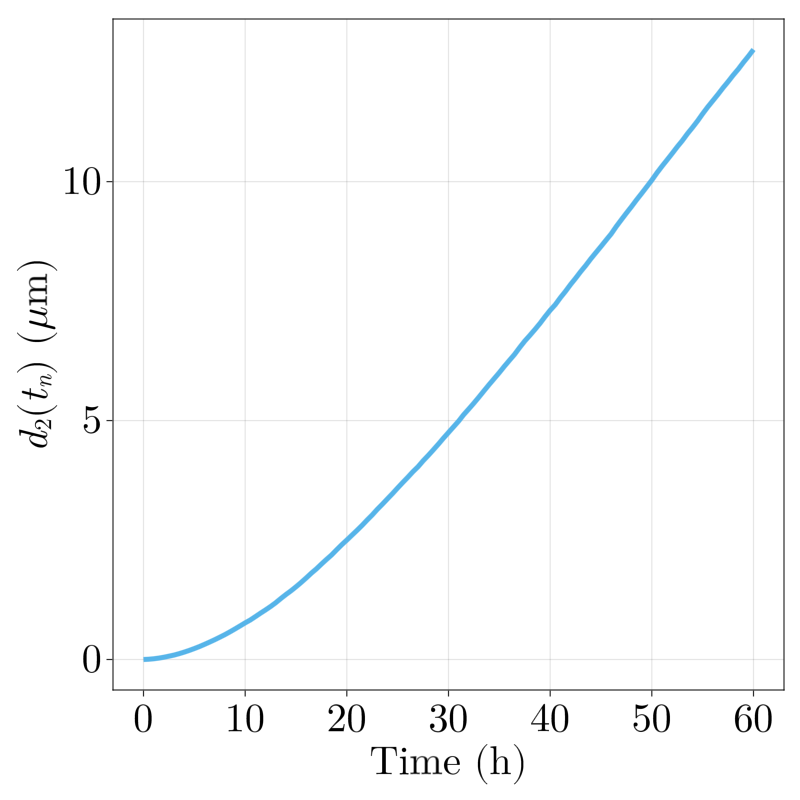

GLMakie.Screen(...)

In [31]:
simple_plot(mtimes, msds, xlabel = "Time (h)", ylabel = L"$d_2(t_n)\text{ ({\mu}m^2})$")

#### tmsd

In [ ]:
tmsds = [tmsd(com_fp10, m1, mn) for mn in (m1+1):m2];

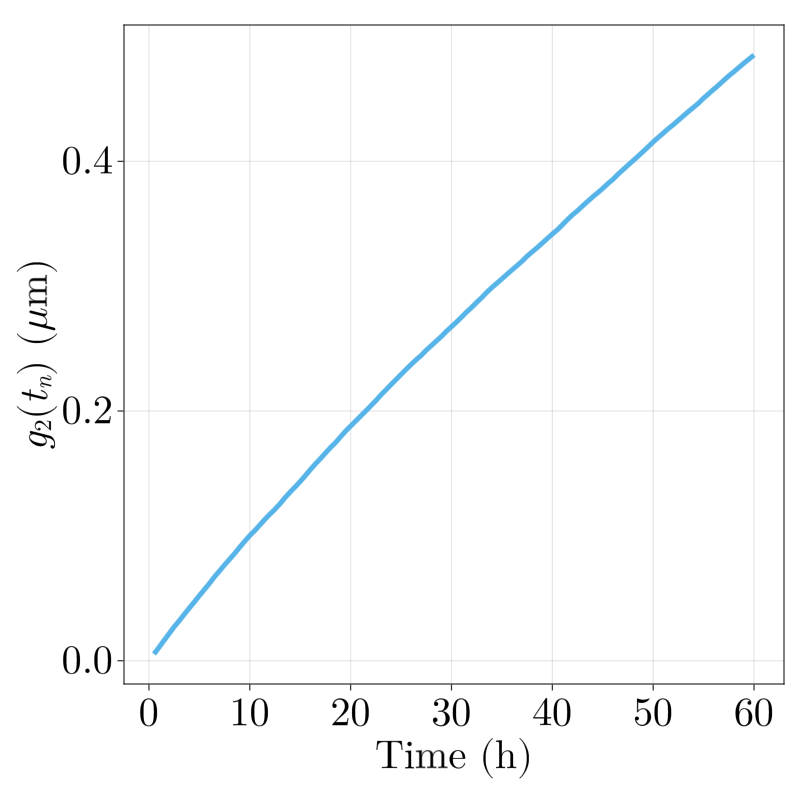

GLMakie.Screen(...)

In [33]:
ttimes = [com_fp10[m].t for m in m1+1:m2]
simple_plot(ttimes, tmsds, xlabel = "Time (h)", ylabel = L"$g_2(t_n)\text{ ({\mu}m^2})$")

#### msd step

In [ ]:
msd_step = [msd(com_fp10, m-1, m) for m in (m1+1):m2];

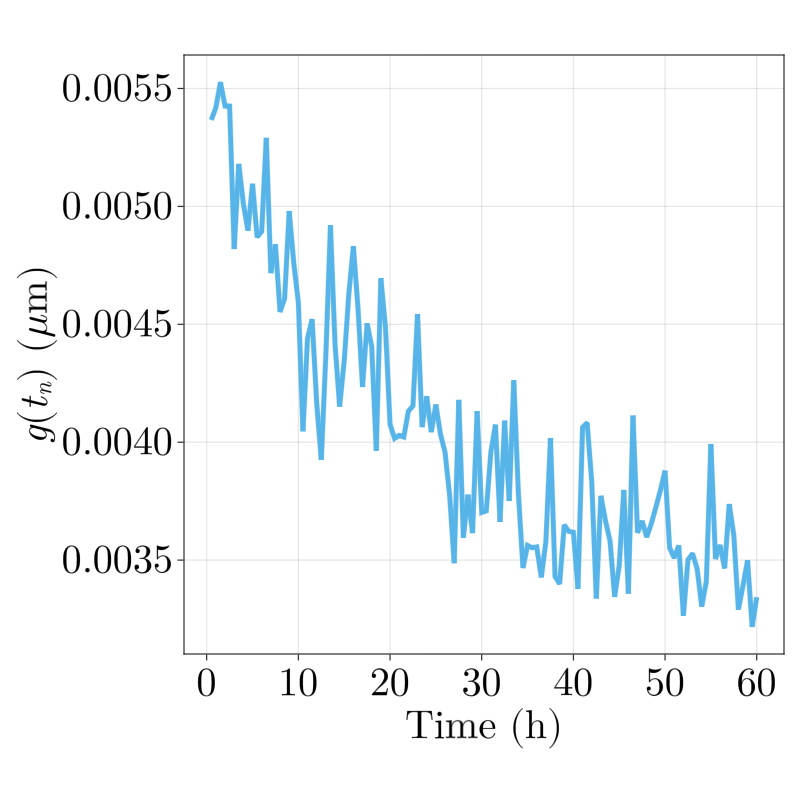

GLMakie.Screen(...)

In [35]:
simple_plot(ttimes, msd_step, xlabel = "Time (h)", ylabel = L"$g(t_n)\text{ ({\mu}m^2})$")

### Differentiation, fp = 50

In [ ]:
com = deepcopy(com_fp0);

In [ ]:
initialize_diff!(com, b=0);
m1 = length(com);
# differentiate!(com, save_each, 30, prot = false)
mechanics_evolve!(com, save_each, 30, prot = true, fp = 50, kp_on = 2, kp_off = 0.5)
m2 = length(com);

In [ ]:
com_fp50 = deepcopy(com)
# com = deepcopy(com_fp0)

In [ ]:
dimensionalize_com!(com_fp50)

In [ ]:
# plot_aggregate(com_fp50, color_map, m1, m2; showtime=true, shownumbers=false)

#### msd

In [ ]:
msds = [msd(com_fp50, m1, m) for m in m1:m2]
mtimes = [com_fp50[m].t for m in m1:m2];

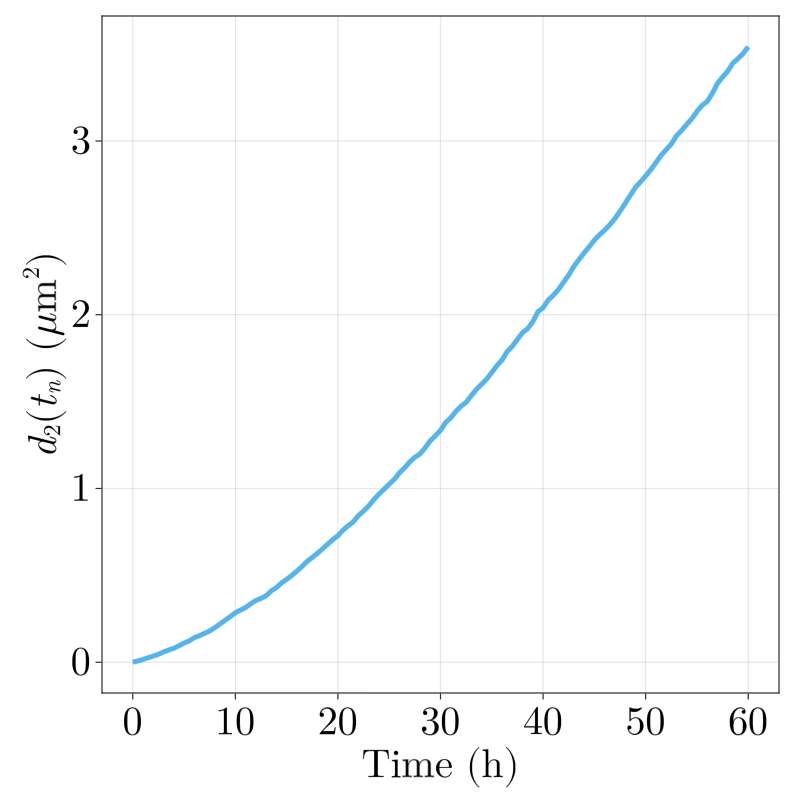

GLMakie.Screen(...)

In [34]:
simple_plot(mtimes, msds, xlabel = "Time (h)", ylabel = L"$d_2(t_n)\text{ ({\mu}m^2})$")

#### tmsd

In [ ]:
tmsds = [tmsd(com_fp50, m1, mn) for mn in (m1+1):m2];

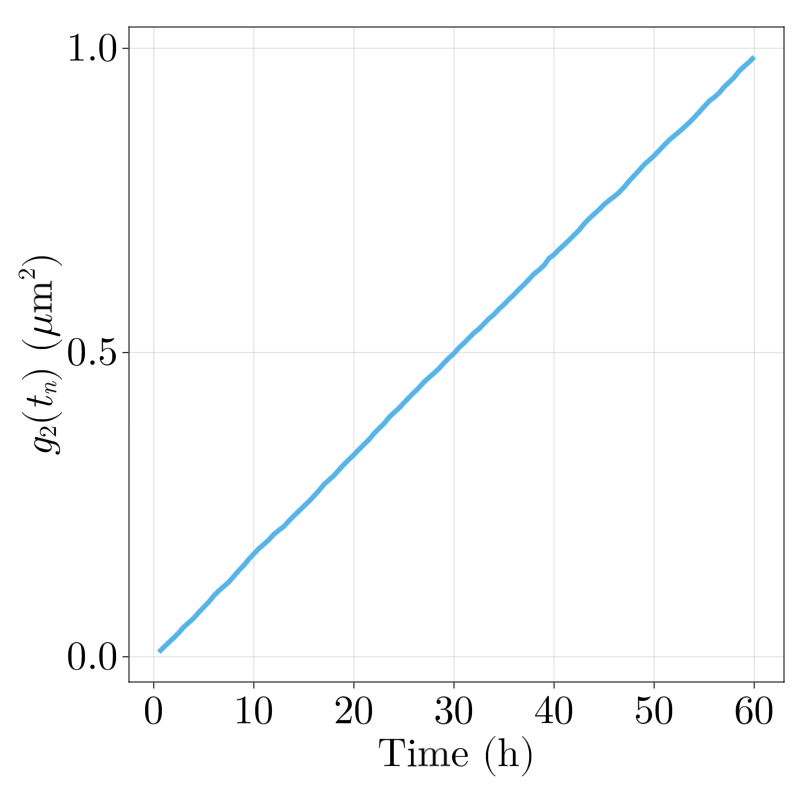

GLMakie.Screen(...)

In [36]:
ttimes = [com_fp50[m].t for m in m1+1:m2]
simple_plot(ttimes, tmsds, xlabel = "Time (h)", ylabel = L"$g_2(t_n)\text{ ({\mu}m^2})$")

#### msd step

In [ ]:
msd_step = [msd(com_fp50, m-1, m) for m in (m1+1):m2];

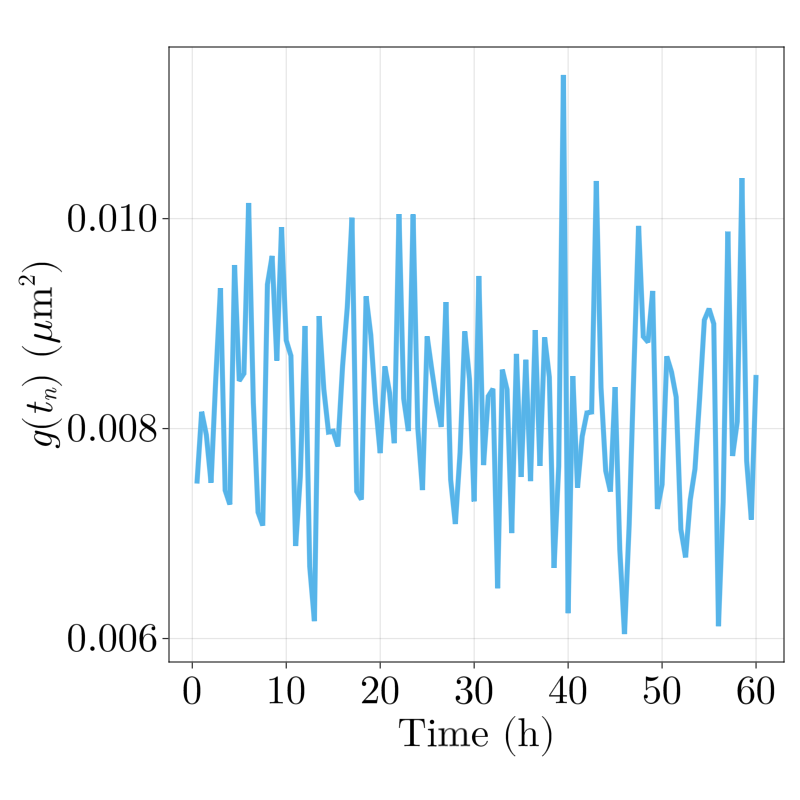

GLMakie.Screen(...)

In [38]:
simple_plot(ttimes, msd_step, xlabel = "Time (h)", ylabel = L"$g(t_n)\text{ ({\mu}m^2})$")

## Letting it accommodate for 120h

### Differentiation, fp = 0 more

In [ ]:
com = deepcopy(growncom);

In [ ]:
initialize_diff!(com, b = 0);
m1 = length(com);
mechanics_evolve!(com, save_each, 60)
m2 = length(com);

In [ ]:
com_fp0_more = deepcopy(com);

In [ ]:
dimensionalize_com!(com_fp0_more)
plot_aggregate(com_fp0_more, color_map, m1, m2; showtime=true, shownumbers=false)

In [ ]:
m1=159;m2=399
msds = [msd(com_fp0_more, m1, m) for m in m1:m2]
mtimes = [com_fp0_more[m].t for m in m1:m2];

#### msd

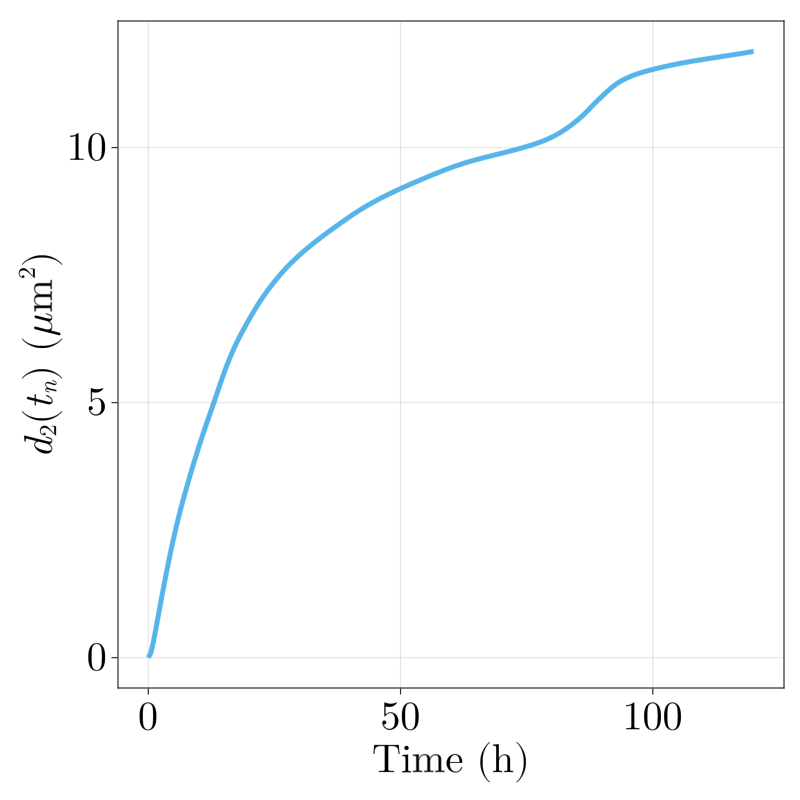

GLMakie.Screen(...)

In [47]:
simple_plot(mtimes, msds, xlabel = "Time (h)", ylabel = L"$d_2(t_n)\text{ ({\mu}m^2})$")

#### tmsd

In [ ]:
tmsds = [tmsd(com_fp0_more, m1, mn) for mn in (m1+1):m2];

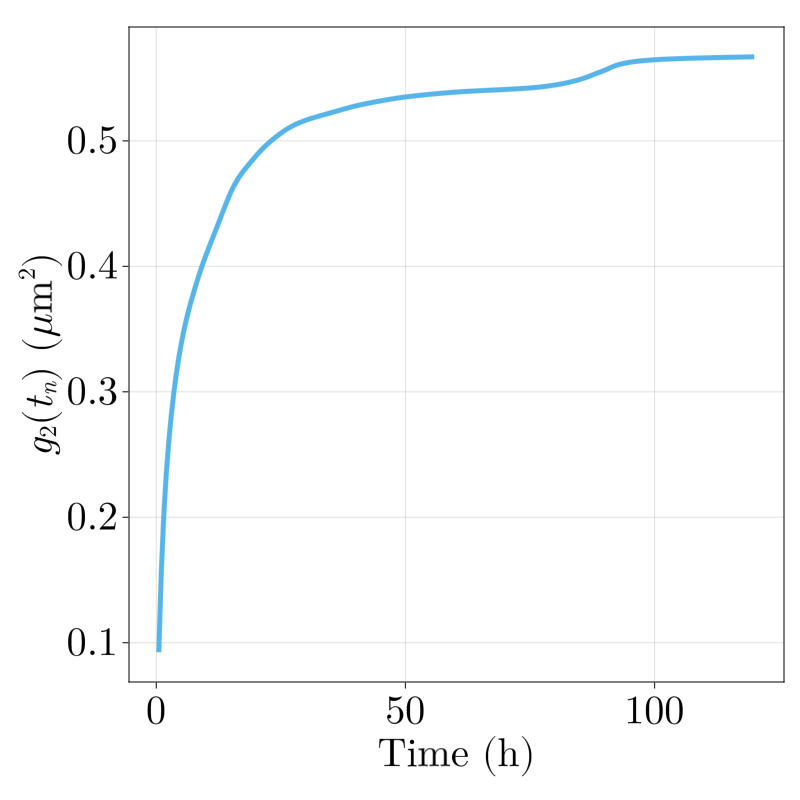

GLMakie.Screen(...)

In [49]:
ttimes = [com_fp0_more[m].t for m in m1+1:m2]
simple_plot(ttimes, tmsds, xlabel = "Time (h)", ylabel = L"$g_2(t_n)\text{ ({\mu}m^2})$")

#### msd step

In [ ]:
msd_step = [msd(com_fp0_more, m-1, m) for m in (m1+1):m2];

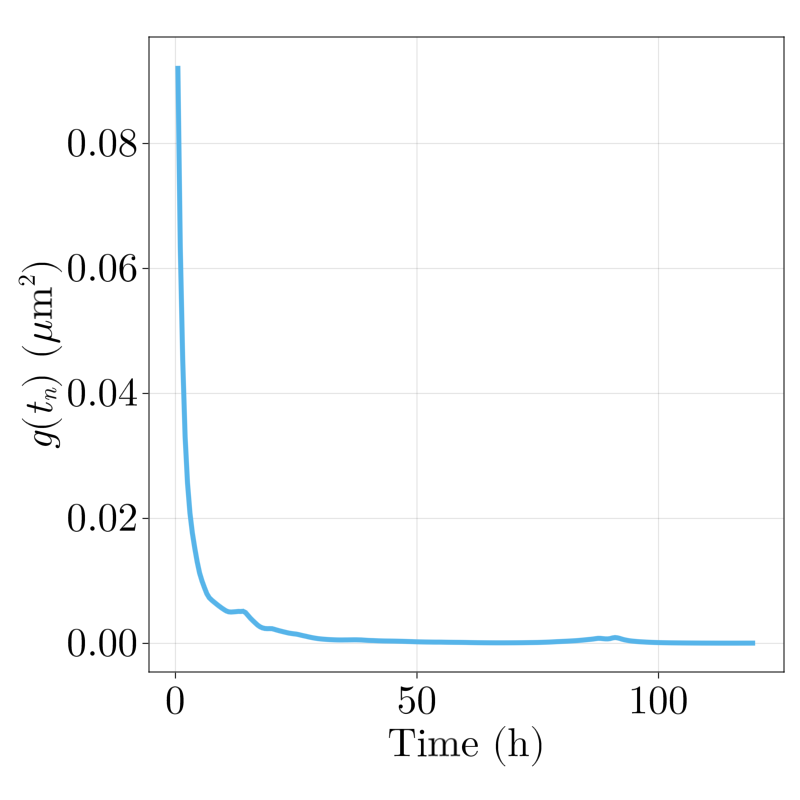

GLMakie.Screen(...)

In [51]:
simple_plot(ttimes, msd_step, xlabel = "Time (h)", ylabel = L"$g(t_n)\text{ ({\mu}m^2})$")

### Differentiation, fp = 10

In [ ]:
com = deepcopy(com_fp0_more);

In [ ]:
initialize_diff!(com, b=0);
m1 = length(com);
# differentiate!(com, save_each, 30, prot = false)
mechanics_evolve!(com, save_each, 30, prot=true, fp = 10, kp_on = 20, kp_off = 10)
m2 = length(com);

In [ ]:
com_fp10_more = deepcopy(com)

In [ ]:
dimensionalize_com!(com_fp10_more)

In [ ]:
plot_aggregate(com, color_map, m1, m2; showtime=true, shownumbers=false)

#### msd

In [ ]:
msds = [msd(com_fp10_more, m1, m) for m in m1:m2]
mtimes = [com_fp10_more[m].t for m in m1:m2];

In [ ]:
simple_plot(mtimes, msds, xlabel = "Time (h)", ylabel = L"$d_2(t_n)\text{ ({\mu}m^2})$")

#### tmsd

In [ ]:
tmsds = [tmsd(com_fp10_more, m1, mn) for mn in (m1+1):m2];

In [ ]:
ttimes = [com_fp10_more[m].t for m in m1+1:m2]
simple_plot(ttimes, tmsds, xlabel = "Time (h)", ylabel = L"$g_2(t_n)\text{ ({\mu}m^2})$")

#### msd step

In [ ]:
msd_step = [msd(com_fp10_more, m-1, m) for m in (m1+1):m2];

In [ ]:
simple_plot(ttimes, msd_step, xlabel = "Time (h)", ylabel = L"$g(t_n)\text{ ({\mu}m^2})$")

### Differentiation, fp = 50

In [ ]:
com = deepcopy(com_fp0_more);

In [ ]:
initialize_diff!(com, b=0);
m1 = length(com);
# differentiate!(com, save_each, 30, prot = false)
mechanics_evolve!(com, save_each, 30, prot = true, fp = 50, kp_on = 2, kp_off = 0.5)
m2 = length(com);

In [ ]:
com_fp50_more = deepcopy(com)
# com = deepcopy(com_fp0)

In [ ]:
dimensionalize_com!(com_fp50_more)

In [ ]:
plot_aggregate(com_fp50_more, color_map, m1, m2; showtime=true, shownumbers=false)

#### msd

In [ ]:
msds = [msd(com_fp50_more, m1, m) for m in m1:m2]
mtimes = [com_fp50_more[m].t for m in m1:m2];

In [ ]:
simple_plot(mtimes, msds, xlabel = "Time (h)", ylabel = L"$d_2(t_n)\text{ ({\mu}m^2})$")

#### tmsd

In [ ]:
tmsds = [tmsd(com_fp50_more, m1, mn) for mn in (m1+1):m2];

In [ ]:
ttimes = [com_fp50_more[m].t for m in m1+1:m2]
simple_plot(ttimes, tmsds, xlabel = "Time (h)", ylabel = L"$g_2(t_n)\text{ ({\mu}m^2})$")

#### msd step

In [ ]:
msd_step = [msd(com_fp50_more, m-1, m) for m in (m1+1):m2];

In [ ]:
simple_plot(ttimes, msd_step, xlabel = "Time (h)", ylabel = L"$g(t_n)\text{ ({\mu}m^2})$"])